This tutorial will introduce you to some basic methods of Natural Language Processing, particularly focusing on the application of text mining.
    - preprocessing data
        - remove stop words
        - remove punctuation
        - strip excess white space
        - all lowercase
        - stemming
        - remove numbers
        - tokenization
    - word cloud
    - cosine similarity to compare
    - Using text to analyze sentiment
    - Using text to classify emotion
    - predicting next word using markov chains
    - predict if text is said by good or bad person

    
    Compare 2 movie directors 

In [81]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/MaxDunaevschi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
def clean_text(text):
    text = text.lower() # make all letters lowercase
    
    text = text.strip() # strip excess whitespace
    
    text = re.sub(r'\d+', '', text) # remove all digits
    
    WORD = re.compile('\w+')
    text = WORD.findall(text) # tokenize the text
    
    stop_words_set = set(stopwords.words('english')) # remove stop words using NLTK
    text = [word for word in text if not word in stop_words_set]
    
    stemmer= PorterStemmer() # Stem all words using NLTK
    text = [stemmer.stem(word) for word in text]
    
    space = " " # Reconstruct string
    text = space.join(text)
    
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) # Remove all alphanumeric value
    return text

In [96]:
test = "   \tHi! My name 6    is Max. I like eating chocolate and playing soccer. I wish you could've came???\t\n\t"
print(clean_text(test))

hi name max like eat chocol play soccer wish could came


In [97]:
# tokenization

In [98]:
import re

In [99]:
def tokenize(text):
    WORD = re.compile('\w+')
    text = clean_text(text)
    words = WORD.findall(text)
    return words

In [101]:
text= "hi! my name     is max. i like eating chocolate and playing soccer. i wish you could've came???"
res = tokenize(text)
print(res)

['hi', 'name', 'max', 'like', 'eat', 'chocol', 'play', 'soccer', 'wish', 'could', 'came']


In [6]:
def token_counts(words):
    tok_counts = dict()
    for word in words:
        if word not in tok_counts:
            tok_counts[word] = 0
        tok_counts[word] += 1
    return tok_counts

In [7]:
def compute_ngram(words, n):
    return [tuple(words[i:i+n]) for i in range(len(words) - n + 1)]

In [45]:
import pandas as pd

In [9]:
text_token_counts = token_counts(res)
df_bow = pd.DataFrame.from_dict(text_token_counts, orient='index', columns=['Count'])
print(df_bow)

           Count
hello          1
my             1
name           1
is             1
Max            1
and            1
I              1
like           1
chocolate      1


In [10]:
# word cloud 

In [11]:
import wordcloud

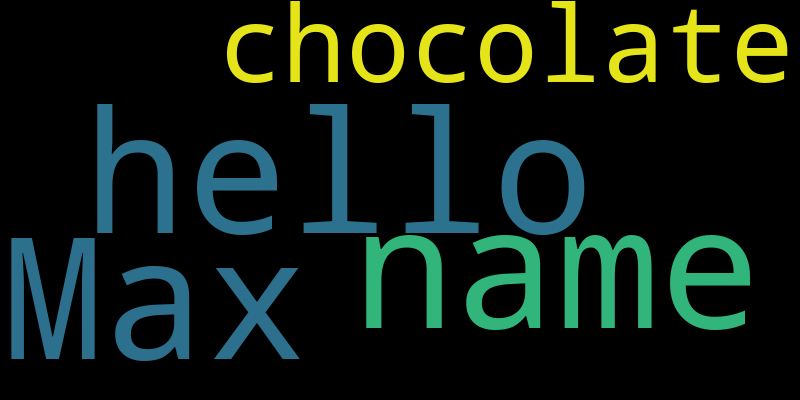

In [12]:
wc = wordcloud.WordCloud(width=800,height=400).generate(text)
wc.to_image()

In [13]:
# cosine similarity 

In [14]:
import math
def compute_cosine_similarity(textA, textB):
    textAWords = tokenize(textA)
    textBWords = tokenize(textB)
    thisTokenCounts = token_counts(textAWords)
    docTokenCounts = token_counts(textBWords)
    
    # Calculating Vector product for numerator of formula
    numerator = 0
    for key in thisTokenCounts:
        if(key in docTokenCounts):
            numerator += (thisTokenCounts.get(key) * docTokenCounts.get(key))
        
    # Calculating vector size for this document
    thisVectorSize = 0;
    for key in thisTokenCounts:
        thisVectorSize += (thisTokenCounts.get(key) ** 2)
    
    # Calculating vector size for other document
    docVectorSize = 0
    for key in docTokenCounts:
        docVectorSize += (docTokenCounts.get(key) ** 2)

    return numerator / (math.sqrt(thisVectorSize) * math.sqrt(docVectorSize))

In [15]:
print(compute_cosine_similarity("my name is Max", "my name is Oscar"))

0.75


In [16]:
# word prediction using markov chains

In [67]:
import pykov
from collections import OrderedDict 
import numpy as np

In [76]:
def predict_next_word(words, givenWord):
    wordCounts = token_counts(words)
    connections = compute_ngram(words, 2)
    connectionsCount = token_counts(connections)
    
    unique_words = np.unique(words)
    print(unique_words)
    word_counts_df = pd.DataFrame(np.zeros((len(unique_words), len(unique_words))))
    # Change the column names 
    print(word_counts_df.shape)
    word_counts_df.columns = unique_words

    # Change the row indexes 
    word_counts_df.index = unique_words
    print(word_counts_df.head())
    
#     vector = dict()
    
#     for connection in connectionsCount:
#         startWord = connection[0]
#         probability = (float(connectionsCount[connection]) / float(wordCounts[startWord]))
#         vector[connection] = probability
        
#     print(vector)

#     chain = pykov.Chain(vector)
#     return chain.walk(3, givenWord)

In [77]:
words = ["I", "like", "chocolate", "I", "like", "soccer", "I", "like", "chocolate", "I", "hate", "mushrooms"]
print(predict_next_word(words, "I"))

['I' 'chocolate' 'hate' 'like' 'mushrooms' 'soccer']
(6, 6)
             I  chocolate  hate  like  mushrooms  soccer
I          0.0        0.0   0.0   0.0        0.0     0.0
chocolate  0.0        0.0   0.0   0.0        0.0     0.0
hate       0.0        0.0   0.0   0.0        0.0     0.0
like       0.0        0.0   0.0   0.0        0.0     0.0
mushrooms  0.0        0.0   0.0   0.0        0.0     0.0
None


In [3]:
def readFile(path):
    with open(path, "rt") as f:
        return f.read()

def writeFile(path, contents):
    with open(path, "wt") as f:
        f.write(contents)

infinity_war_script_text = readFile("infinity_war_script.txt")

In [42]:
text = '\"character\" \"dialogue\"\n'
line_number = 1
for line in infinity_war_script_text.splitlines():
    colon_idx = line.find(":")
    if(colon_idx != -1):
        if(line.startswith("[")):
            character = line[1:colon_idx - 1]
        else:
            character = line[:colon_idx]
        dialogue = line[colon_idx + 1:]
        dialogue = re.sub("[\(\[].*?[\)\]]", "", dialogue)
        dialogue = dialogue.strip()
        text += f'\"{line_number}\" \"{character}\" \"{dialogue}\"\n'
        line_number += 1
print(text)

"character" "dialogue"
"1" "Asgardian PA" "This is the Asgardian refugee vessel Statesman! We are under assault, I repeat, we are under assault – The engines are dead, life support failing! Requesting aid from any vessel within range…We are 22 jump points out of Asgard. Our crew is made up of Asgardian families, we have very few soldiers here! This is not a war craft, I repeat, this is not a war craft!"
"2" "Ebony Maw" "Hear me, and rejoice. You have had the privilege of being saved by the Great Titan. You may think this is suffering. No…It is salvation. Universal scales tip toward balance because of your sacrifice. Smile…For even in death, you have become Children of Thanos."
"3" "Thanos" "I know what it’s like to lose. To feel so desperately that you’re right… yet to fail, nonetheless.  It’s frightening. Turns the legs to jelly. I ask you, to what end? Dread it. Run from it. Destiny arrives all the same. And now, it’s here. Or should I say…I AM."
"4" "Thor" "You talk too much."
"5" "

In [56]:
df = pd.read_csv("infinity_war_script.txt", delimiter = " ")
df

,character,dialogue
1,Asgardian PA,This is the Asgardian refugee vessel Statesman...
2,Ebony Maw,"Hear me, and rejoice. You have had the privile..."
3,Thanos,I know what it’s like to lose. To feel so desp...
4,Thor,You talk too much.
5,Thanos,"The Tesseract, or your brother’s head. I assum..."
...,...,...
996,Hill,There’s no one here.
997,Fury,Call control. Code Red!
998,Hill,Nick…?
999,Fury,Hill?


In [55]:
dialogue_text = df["dialogue"].str.cat(sep =" ")

In [70]:
fury_lines_df = script_df[script_df['character'] == 'Nick Fury']
fury_dialogue_text = fury_lines_df["dialogue"].str.cat(sep =" ")

fury_dialogue_tokens = clean_text(fury_dialogue_text)
fury_dialogue_bigrams = compute_ngram(fury_dialogue_tokens, 2)

fury_dialogue_bow = token_counts(fury_dialogue_tokens)
fury_dialogue_bow_bigrams = token_counts(fury_dialogue_bigrams)

probabilities = []
bow_keys = list(fury_dialogue_bow.keys())
for i in range(len(bow_keys) - 1):
    word_probabilities = []
    word = bow_keys[i]
    for j in range(len(bow_keys)):
        word2 = bow_keys[j]
        bigram = (word, word2)
        bigram_count = fury_dialogue_bow_bigrams.get(bigram)
        if(bigram_count == None):
            bigram_count = 0
        prob = float(bigram_count) / float(fury_dialogue_bow.get(word))
        word_probabilities.append(prob)
    probabilities.append(word_probabilities)
    
fury_markov_probs_df = pd.DataFrame(data=np.array(probabilities), index=bow_keys[:-1], columns=bow_keys)
print(fury_markov_probs_df)

np.random.choice(bow_keys, p=fury_markov_probs_df.loc["oh"])

           still  word  stark  energy  signature  new  york  tell  klein  \
still        0.0   1.0    0.0     0.0        0.0  0.0   0.0   0.0    0.0   
word         0.0   0.0    1.0     0.0        0.0  0.0   0.0   0.0    0.0   
stark        0.0   0.0    0.0     1.0        0.0  0.0   0.0   0.0    0.0   
energy       0.0   0.0    0.0     0.0        1.0  0.0   0.0   0.0    0.0   
signature    0.0   0.0    0.0     0.0        0.0  1.0   0.0   0.0    0.0   
new          0.0   0.0    0.0     0.0        0.0  0.0   1.0   0.0    0.0   
york         0.0   0.0    0.0     0.0        0.0  0.0   0.0   1.0    0.0   
tell         0.0   0.0    0.0     0.0        0.0  0.0   0.0   0.0    1.0   
klein        0.0   0.0    0.0     0.0        0.0  0.0   0.0   0.0    0.0   
meet         0.0   0.0    0.0     0.0        0.0  0.0   0.0   0.0    0.0   
okay         0.0   0.0    0.0     0.0        0.0  0.0   0.0   0.0    0.0   
call         0.0   0.0    0.0     0.0        0.0  0.0   0.0   0.0    0.0   
control     

'motherf'

In [31]:
def predict_next_word(dialogue_text, current_word):
    dialogue_tokens = clean_text(dialogue_text)
    print(dialogue_tokens)
    if(current_word not in dialogue_tokens):
        return "Word not in text"
    dialogue_bigrams = compute_ngram(dialogue_tokens, 2)

    dialogue_bow = token_counts(dialogue_tokens)
    dialogue_bow_bigrams = token_counts(dialogue_bigrams)

    probabilities = []
    bow_keys = list(dialogue_bow.keys())
    for i in range(len(bow_keys) - 1):
        word_probabilities = []
        word = bow_keys[i]
        for j in range(len(bow_keys)):
            word2 = bow_keys[j]
            bigram = (word, word2)
            bigram_count = dialogue_bow_bigrams.get(bigram)
            if(bigram_count == None):
                bigram_count = 0
            prob = float(bigram_count) / float(dialogue_bow.get(word))
            word_probabilities.append(prob)
        probabilities.append(word_probabilities)

    markov_probs_df = pd.DataFrame(data=np.array(probabilities), index=bow_keys[:-1], columns=bow_keys)
    print(markov_probs_df)

    return np.random.choice(bow_keys, p=markov_probs_df.loc[current_word])

print(predict_next_word(spider_man_lines_df["dialogue"].str.cat(sep =" "), "stark"))

['ned', 'hey', 'need', 'cause', 'distraction', 'hey', 'man', 'mr', 'stark', 'field', 'trip', 'moma', 'guy', 'problem', 'mr', 'stark', 'cool', 'uhhh', 'mr', 'stark', 'beamed', 'said', 'save', 'wizard', 'breathe', 'yeah', 'make', 'sense', 'mr', 'stark', 'smell', 'like', 'new', 'car', 'oh', 'come', 'oh', 'god', 'stayed', 'bus', 'yeah', 'uh', 'speaking', 'loyalty', 'know', 'gonna', 'say', 'gonna', 'go', 'home', 'long', 'way', 'thought', 'way', 'kinda', 'stuck', 'side', 'ship', 'suit', 'ridiculously', 'intuitive', 'way', 'anything', 'kinda', 'fault', 'take', 'back', 'space', 'think', 'friendly', 'neighborhood', 'spider', 'man', 'neighborhood', 'okay', 'really', 'make', 'sense', 'know', 'trying', 'say', 'um', 'okay', 'okay', 'uh', 'okay', 'ever', 'see', 'really', 'old', 'movie', 'alien', 'yes', 'wait', 'hey', 'officially', 'met', 'cool', 'backup', 'peter', 'way', 'oh', 'using', 'made', 'name', 'um', 'spider', 'man', 'hey', 'going', 'yep', 'got', 'okay', 'okay', 'ready', 'might', 'wanna', 'tu

NameError: name 'compute_ngram' is not defined

In [19]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
 
def read_article(file_name):
    
    article = file_name.split(". ")
    return article

# def sentence_similarity(sent1, sent2, stopwords=None):
#     if stopwords is None:
#         stopwords = []
 
#     sent1 = [w.lower() for w in sent1]
#     sent2 = [w.lower() for w in sent2]
 
#     all_words = list(set(sent1 + sent2))
 
#     vector1 = [0] * len(all_words)
#     vector2 = [0] * len(all_words)
 
#     # build the vector for the first sentence
#     for w in sent1:
#         if w in stopwords:
#             continue
#         vector1[all_words.index(w)] += 1
 
#     # build the vector for the second sentence
#     for w in sent2:
#         if w in stopwords:
#             continue
#         vector2[all_words.index(w)] += 1
 
#     return 1 - cosine_distance(vector1, vector2)
 
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = compute_cosine_similarity(sentences[idx1], sentences[idx2])

    return similarity_matrix


def generate_summary(file_name, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)
    print("Finished getting sentences")

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)
    print("Finished sim matrix")

#     # Step 3 - Rank sentences in similarity martix
#     sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
#     scores = nx.pagerank(sentence_similarity_graph)
#     print("Finished getting scores")

#     # Step 4 - Sort the rank and pick top sentences
#     ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
#     #print("Indexes of top ranked_sentence order are ", ranked_sentence)    
#     print("Finished ranking sentences")

#     for i in range(top_n):
#         summarize_text.append(" ".join(ranked_sentence[i][1]))

#     # Step 5 - Offcourse, output the summarize texr
#     print("Summarize Text: \n", ". ".join(summarize_text))

# let's begin
script_text = script_df["dialogue"].str.cat(sep =" ")
generate_summary(script_text, 2)

Finished getting sentences


KeyboardInterrupt: 

In [146]:
# dialogue_tr = [['just plain boring', -1], ['entirely predictable and lacks energy', -1], ['no surprises and very few laughs', -1], ['very powerful', 1], ['the most fun film of the summer', 1]]
  
# # Create the pandas DataFrame
# dialogue_train = pd.DataFrame(dialogue_tr, columns = ['dialogue', 'label'])

# # attach labels 
# dialogue_te = [['predictable with no fun']]
  
# # Create the pandas DataFrame
# dialogue_test = pd.DataFrame(dialogue_te, columns = ['dialogue'])
  

dialogue_df = script_df[script_df["character"] != "None"]
dialogue_df = dialogue_df.dropna()
# print(len(dialogue_df))
# print(dialogue_df)

# attach labels 
#dialogue_labels_df = pd.read_csv("sentiment_labels.txt", delimiter = " ")
#dialogue_labels_df = dialogue_labels_df.dropna()
#indexes = list(dialogue_df.index.values)
#dialogue_labels_df = dialogue_labels_df.set_index([indexes])
# print(len(dialogue_labels_df))
# print(dialogue_labels_df)

#dialogue_with_labels_df = pd.merge(dialogue_df, dialogue_labels_df, left_index=True, right_index=True)
#dialogue_with_labels_df = dialogue_with_labels_df.rename(columns={"dialogue_x": "dialogue"})
dialogue_with_labels_df = pd.read_csv("sentiment_dialogue_labels.txt", delimiter = " ")

# print(dialogue_with_labels_df)
# print(len(dialogue_with_labels_df))

# split data into train and test
dialogue_with_labels_df_copy = dialogue_with_labels_df.copy()
dialogue_train = dialogue_with_labels_df_copy.sample(frac=0.8, random_state=0)
dialogue_test = dialogue_with_labels_df_copy.drop(dialogue_train.index)


# split training data into negative and positive instances
def split_by_labels(dialogue_train):
    label_instances = {}
    for _, row in dialogue_train.iterrows():
        label = row["label"]
        if(label not in label_instances):
            label_instances[label] = []
        tokenized_dialogue = clean_text(row["dialogue"])
        if(tokenized_dialogue != []):
            label_instances[label].append(tokenized_dialogue)
    return label_instances


split_data = split_by_labels(dialogue_train)
# print(split_data)
# print("\n")

neg_text = split_data[-1]
# print(neg_text)
num_neg_text = float(len(neg_text))
# print(num_neg_text)
neg_text_tc = token_counts(list(np.concatenate(neg_text).flat))
# print(neg_text_tc)
neg_text_tc_total = sum(neg_text_tc.values())
# print(neg_text_tc_total)
# print("\n")
pos_text = split_data[1]
# print(pos_text)
num_pos_text = float(len(pos_text))
# print(num_pos_text)
pos_text_tc = token_counts(list(np.concatenate(pos_text).flat))
# print(pos_text_tc)
pos_text_tc_total = sum(pos_text_tc.values())
# print(pos_text_tc_total)
# print("\n")

total_text_counts = (num_neg_text + num_pos_text)
# print(total_text_counts)
neg_log_prob = np.log(num_neg_text / total_text_counts)
# print(neg_log_prob)
pos_log_prob = np.log(num_pos_text / total_text_counts)
# print(pos_log_prob)
# print("\n")

all_words = list(np.concatenate(neg_text).flat) + list(np.concatenate(pos_text).flat)
all_words_set = set(all_words)
all_words_set_len = len(all_words_set)
# print(all_words_set)
# print("\n")

neg_word_likelihood = {}
pos_word_likelihood = {}
for word in all_words_set:
    neg_word_count = 0
    if(word in neg_text_tc):
        neg_word_count = neg_text_tc[word]
        
    pos_word_count = 0
    if(word in pos_text_tc):
        pos_word_count = pos_text_tc[word]
        
    neg_word_likelihood[word] = np.log((neg_word_count + 1) / (neg_text_tc_total + 1 * all_words_set_len))
    pos_word_likelihood[word] = np.log((pos_word_count + 1) / (pos_text_tc_total + 1 * all_words_set_len))
    

# print(neg_word_likelihood)
# print(pos_word_likelihood)

def predict(df):
    correct = 0
    for _, row in df.iterrows(): 
        line = row['dialogue']
        words = clean_text(row["dialogue"])
        neg_pred_score = neg_log_prob
        pos_pred_score = pos_log_prob
        for word in words:
            if(word in all_words_set):
                neg_pred_score += neg_word_likelihood[word]
                pos_pred_score += pos_word_likelihood[word]

        actual_row = dialogue_labels_df[dialogue_labels_df["dialogue"] == line]
        actual = actual_row["label"].values[0]
        #print(actual)
        if(neg_pred_score >= pos_pred_score):
            #print(f"prediction for {line} is -1")
            pred = -1
        else:
            #print(f"prediction for {line} is 1")
            pred = 1
        if(pred == actual):
            correct += 1
        else:
            print(f"prediction for {line} is {pred}")
    acc = correct / (len(dialogue_test))
    print(f"\nPrediction accuracy: {acc}")
    
predict(dialogue_test)

prediction for Undying? You should choose your words more carefully. is 1
prediction for Lost me. is -1
prediction for From the dawn of the universe, there was nothing. Then, boom! The Big Bang sent six elemental crystals, hurtling across the virgin universe. These Infinity Stones each control an essential aspect of existence. is -1
prediction for Certainly not. I speak for myself.  But you’re trespassing in this city and on this planet. is 1
prediction for Nooooooo! is 1
prediction for Not cool! is 1
prediction for Language! is 1
prediction for If it's with the Collector, then it's not safe. Only an idiot would give that man a stone. is 1
prediction for All words are made up. is 1
prediction for No. You simply lack the strength to wield them. Your bodies will crumble as your minds collapse into the madness. is 1
prediction for Tell me what you feel. is -1
prediction for I'd rather give it to you. is -1
prediction for What's wrong, little one? is -1
prediction for I imagine it's like b

In [143]:
# info = '\"dialogue\" \"label\"\n'
# line_number = 1
# for index, row in dialogue_with_labels_df.iterrows():
#     dia = row["dialogue"]
#     label = row["label"]
#     info += f'\"{index}\" \"{dia}\" \"{label}\"\n'
#     line_number += 1
# print(info)
#writeFile("sentiment_dialogue_labels.txt", info)

In [122]:
# labels_text = readFile("sentiment_labels.txt")

In [144]:
# dialogue_df_s = script_df[script_df["character"] != "None"]
# print(dialogue_df_s)
# info = '\"dialogue\" \"label\"\n'
# line_number = 1
# for _, row in dialogue_df_s.iterrows():
#     #print(row)
#     dia = row["dialogue"]
#     name = row.Name
#     info += f'\"{name}\" \"{dia}\" \"{1}\"\n'
#     line_number += 1
# print(info)
#writeFile("sentiment_labels.txt", info)

In [ ]:
bad_characters = {"Thanos", "Collector", "Corvus Glaive", "Cull Obsidian", "Ebony Maw", "Loki", "Red Skull"}

def is_bad_character(character):
    if(character in bad_characters):
        return 1
    return 0

dialogue_df = script_df[script_df["character"] != "None"]
dialogue_df = dialogue_df.dropna()

dialogue_df_copy = dialogue_df.copy()
dialogue_train = dialogue_df_copy.sample(frac=0.8, random_state=0)
dialogue_test = dialogue_df_copy.drop(dialogue_train.index)

data_train = [(is_bad_character(row["character"]), clean_text(row["dialogue"])) for _, row in dialogue_train.iterrows() if clean_text(row["dialogue"]) != []] 
data_test = [(None, clean_text(row["dialogue"])) for _, row in dialogue_test.iterrows() if clean_text(row["dialogue"]) != []]

vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(preprocessor=lambda x : x, tokenizer=lambda x : x, token_pattern=None)

corpus = [words for (_, words) in data_train]
labels = [label for (label, _) in data_train]
test_corpus = [words for (_, words) in data_test]

train_features = vectorizer.fit_transform(corpus)
train_labels = np.array(labels)
test_features = vectorizer.transform(test_corpus)

model = sklearn.svm.LinearSVC(loss="hinge", random_state=0, C=1.0, max_iter=10000)
model = model.fit(train_features, train_labels)

train_predictions = model.predict(train_features)
print(sklearn.metrics.f1_score(train_labels, train_predictions))

test_predictions = model.predict(test_features)
# dialogue_test["predicted"] = test_predictions
# model = sklearn.svm.LinearSVC(loss="hinge", random_state=0, C=1.0, max_iter=10000)
# trained_model = model.fit()

In [25]:
# get mentions of names from lines 
# check words around 
# compute normalized frequency score 

iron_man_lines_df = script_df[script_df['character'] == 'Tony Stark']
#fury_dialogue_text = fury_lines_df["dialogue"].str.cat(sep =" ")

character_relationships = dict()
characters = set(script_df["character"].unique())
for _, row in iron_man_lines_df.iterrows():
    dialogue_tokens = clean_text(row["dialogue"])
    print(dialogue_tokens)
    for token in dialogue_tokens:
        if(token in characters):
            if(token not in character_relationships):
                character_relationships[token] = []
            character_relationships.extend(dialogue_tokens)

print(character_relationships)

['slow', 'slow', 'totally', 'kidding']
[]
['look', 'know', 'dream', 'dream', 'gotta', 'pee']
['okay', 'like', 'oh', 'god', 'bathroom', 'gonna', 'oh', 'someone', 'watching', 'gonna', 'go', 'pant']
['yes']
['right', 'point', 'trying', 'make', 'apropos', 'last', 'night', 'dreamt', 'kid', 'real', 'named', 'eccentric', 'uncle', 'uh', 'name']
['morgan', 'morgan']
['expecting']
['yes']
['dream', 'real']
['glad', 'brought', 'cause', 'nothing', 'housing', 'unit', 'nano', 'particle']
['attachment']
['know', 'surgery', 'trying', 'protect', 'future', 'us', 'case', 'monster', 'closet', 'instead', 'know']
['know', 'well', 'finish', 'sentence']
['yeah', 'know', 'surprise', 'gonna', 'nice', 'dinner', 'tonight', 'show', 'harry', 'win', 'stone', 'right', 'surprise', 'ever', 'promise']
[]
['sorry', 'giving', 'ticket', 'something']
[]
['bruce']
['okay']
['tell', 'name']
['timeline']
['seriously', 'say', 'hitherto', 'undreamt']
[]
['going', 'allow', 'thanos', 'need', 'six', 'stick', 'one', 'garbage', 'disp

In [158]:
# we have provided labels for the dialogue lines which can be found in the sentiment_dialogue_labels.txt file
dialogue_with_labels_df = pd.read_csv("sentiment_dialogue_labels.txt", delimiter = " ")

# split data into train and test
dialogue_with_labels_df_copy = dialogue_with_labels_df.copy()
dialogue_train = dialogue_with_labels_df_copy.sample(frac=0.8, random_state=0)
dialogue_test = dialogue_with_labels_df_copy.drop(dialogue_train.index)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer = clean_text, binary = True, min_df=2, max_df = 0.5)

dialogue_lines_train = [row["dialogue"] for _, row in dialogue_train.iterrows()]
X = cv.fit_transform(dialogue_lines_train)

num_clusters = 2
kmeans_model = sklearn.cluster.KMeans(n_clusters = num_clusters, n_init = 10, max_iter=100)
kmeans_model = kmeans_model.fit(X)

centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in centroids[i, :20]:
        print(terms[ind])
    print("\n")


for _, row in dialogue_train.iterrows(): 
    line = row["dialogue"]
    label = row["label"]
    Y = cv.transform([line])
    cluster_prediction = kmeans_model.predict(Y)[0]
    print(f"{line} predicted as cluster {cluster_prediction}")


#print(f"Accuracy: {correct / len(dialogue_test)}")

Cluster 0:
stone
know
right
get
go
thanos
yeah
like
think
okay
oh
gonna
time
let
come
back
take
got
really
man


Cluster 1:
one
time
thanos
know
stone
need
want
universe
ever
alright
life
yeah
let
gamora
even
going
kill
get
could
fate


Fall back! Fall back now! predicted as cluster 0
Are you sure you're up to this particular murder mission? predicted as cluster 0
Lemme just ask the captain. Oh, wait a second, it's me! Yeah, I'll go. predicted as cluster 0
Thank you, Captain. predicted as cluster 0
I'm the only one who knows that. At least, I'm the only one with the will to act on it.  For a time... you had that same will... as you fought by my side. Daughter. predicted as cluster 1
Tree, help me find the handle! predicted as cluster 0
No… Loki…. predicted as cluster 0
What happened? predicted as cluster 0
Don't you think that we should all have a weapon like that? predicted as cluster 0
Flash Gordon? By the way, that's a compliment. Don't forget, I'm half human.  So that 50% of me tha

Something's entered the atmosphere. predicted as cluster 0
I'm glad you brought this up, 'cause it's nothing. It's just a housing unit for nano particles. predicted as cluster 0
She's on the field. Take it. predicted as cluster 0
Something's wrong. The star's gone out. And the rings are frozen. predicted as cluster 0
There's six stones out there.  Thanos already has the Power Stone because he stole it last week, when he decimated Xandar. He stole the Space Stone from me when he destroyed my ship and slaughtered half my people. The Time and Mind Stones are safe on Earth. They're with the Avengers. predicted as cluster 0
Cap. That's him. predicted as cluster 0
Gamora. predicted as cluster 0
Come and get some, space dogs!  Come on, get some, get some! Come on, get some!  How much for the gun? predicted as cluster 0
Eitri, wait! Stop! predicted as cluster 0
Damn it. predicted as cluster 0
How many did you see? predicted as cluster 0
I remember your signature on those papers, Colonel. predi

Eitri, this isn't about your hands. Every weapon you've ever designed: every ax, hammer, sword - it's all inside your head. predicted as cluster 0
Uh, buck and a half. predicted as cluster 0
Space. Reality. Power. Soul. Mind. And Time. predicted as cluster 0
It's nano-tech. You like it? A little someth-- predicted as cluster 0
Then stay. Stay with me. predicted as cluster 0
I take it, the Maw is dead. This day extracts a heavy toll. Still, he accomplished his mission. predicted as cluster 0
One. predicted as cluster 1
So is facing Thanos without that ax. predicted as cluster 0
What? Tony, you lost another super bot? predicted as cluster 0
Magnificent! Magnificent!!!! Magnificent!!!!!!! predicted as cluster 0
One way or another, the path that we're on leads to Thanos. predicted as cluster 1
Show me. predicted as cluster 0
Oh yeah? You don't wanna tell me where she is? That's fine. I'll kill all three of you and beat it out of Thanos myself.  Starting with you. predicted as cluster 0
We 

You know us? predicted as cluster 0
We... have blood to spare. predicted as cluster 0
Yeah, he has! predicted as cluster 0
Zen-Whoberis... Choose a side, or die. predicted as cluster 0
Them we better keep 'em in front of us. predicted as cluster 0
No resurrections this time. predicted as cluster 0
Yep, got it. predicted as cluster 0
Drax. Drax. predicted as cluster 0
A small price to pay for salvation. predicted as cluster 0
Ours? predicted as cluster 0
You talk too much. predicted as cluster 0
F.R.I.D.A.Y., evac anyone south of 43rd Street, notify first responders. predicted as cluster 0
Can you stand? predicted as cluster 0
Don't, don't, don't engage, we've almost got this off! predicted as cluster 0
Allfathers, give me strength. predicted as cluster 0
Oh, yeah...you're much more of a Thanos. predicted as cluster 0
I don't think this thing works. Everything seems dark. predicted as cluster 0
That's suicide. predicted as cluster 0
Whoa! predicted as cluster 0
How much longer, Shuri? p

**-------------------------------------------------**

## Introduction

This tutorial will introduce you to some basic methods of Natural Language Processing, particularly focusing on the application of text mining. Text mining, also known as text analytics, is the process of converting unstructured, free text into normalized, structured data that can be analyzed. Text mining identifies facts, relationships and assertions that would otherwise remain unidentified in the textual big data. Understanding text is a key feature of some of the prominent machine learning models such as emotion/sentiment detection, smart compose, and smart reply. 
<br/><br/>



### Tutorial Content

Imagine that you are an actor preparing for your upcoming role in the Avengers:Infinity War movie. When actors begin preparing for a role they must thoruoghly examine the script. On the first read, they try to get a sense of the story. On the second read, they try to focus on their character specifically. To get yourself in the mindset of your character, you need to analyze the script in order to figure out the important topics of the film, emotions and actions you should convey when reading your lines, and interactions with other characters. However, your role was given to you on short notice so you do not have a lot of time to prepare. In order to speed up the process of understanding your role, you decided to use text mining.

In this tutorial, we will show how to do some basic text analysis in Python.

We'll be using the Avengers: Infinity War script: https://transcripts.fandom.com/wiki/Avengers:_Infinity_War. The script is an example of free text. Free text can be found almost anywhere such as through twitter posts, books, scripts, emails, documents, databases, or any other place where writing exists. The analysis we do here could be repeated for any other form of free text. 

We will cover the following topics in this tutorial:
- [Installing the libraries](#installation)
- [Structuring free text](#structuring)
- [Preprocessing dialogue](#preprocessing)
- [Token Applications](#token)
- [Contextual Applications](#context)
- [Summary and references](#summary)
<br/>

## <a name="installation"></a> Installing the libraries

Before getting started, you'll need to install the various libraries that we will use. You can install pandas, wordcloud, nltk, and scikit-learn using pip:

In [2]:
!pip install pandas
!pip install wordcloud
!pip install nltk
!pip install scikit-learn

You should consider upgrading via the '/Users/MaxDunaevschi/miniconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/MaxDunaevschi/miniconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/MaxDunaevschi/miniconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/MaxDunaevschi/miniconda3/bin/python -m pip install --upgrade pip' command.


After you run all the installs, make sure the following commands work for you:

In [27]:
import pandas as pd
import wordcloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
import math
import sklearn
import sklearn.feature_extraction
import sklearn.svm
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/MaxDunaevschi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/MaxDunaevschi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<br/>


## <a name="structuring"></a> Structuring free text

Since there isn't much time to prepare, instead of reading through the entire script you decide that the best way to understand the story is analyze the words. Howeever, before any text can be analyzed it must be converted from free text into structured data. Structured data refers to text organized into a tabular format with numerous rows and columns, making it easier to store and process for analysis and machine learning algorithms.

The first step in structuring data is to determine what sort of features we want extracted from the text, as well as what information we can exclude. The best way to determine this information is by looking at the free text. Shown below is a snippet of a conversation between Ebony Maw, Thanos, Loki, and Thor in the Infinity War script.

![image](./pictures/dialogue.png)

The snippet of the script includes some basic information on who is talking, the actions the character is taking, and the shifts between referencing another character while talking (switching from talking to one person to another person). In order to better prepare for the role, we need to extract important infromation such as the actions of the characters, as well as which character is speaking and what they say. 

We can reformat the data via .txt manipulation. Begin by creating an empty text file named 'infinity_war_script.txt'. Once this file is created copy and paste the entire script into the file. After completed the above steps, your data should look like the following:

![image](./pictures/script.png)

Note that as of right now, this is the exact script of the movie. Now that we have the raw text placed into a file, we can begin to manipulate it to format the text in a structured manner. In order to manipulate the text, we need to be able to read and write to the file:

In [2]:
def readFile(path): # reads the content of the file from the given path
    with open(path, "rt") as f:
        return f.read()

def writeFile(path, contents): # updates the content of the file from the given path
    with open(path, "wt") as f:
        f.write(contents)

We can use the readFile function defined above to read the current contents of the file, and assert that the information is being retrieved properly.

In [3]:
infinity_war_script_text = readFile("infinity_war_script.txt")
print(infinity_war_script_text) # print the script

[Marvel Opening Credits]

[Radio transmission sound]

[The Marvel Studios Logo plays as usual but this time, at the end of that logo, the background changes from red to black and the I and O in "Studios" become 10 in red. The logo now reads "Marvel Stud10s". Throughout the logo, an Asgardian is reporting a distress signal.]

Asgardian PA: This is the Asgardian refugee vessel Statesman. We are under assault, I repeat, we are under assault - The engines are dead, life support failing. Requesting aid from any vessel within range. We are 22 jump points out of Asgard. [The voice becomes more desperate and pleading] Our crew is made up of Asgardian families, we have very few soldiers here. This is not a warcraft. I repeat, this is not a warcraft! [The ship is being hit by missiles.]

[Inside the ship, Ebony Maw walks among the bodies of dead Asgardians. Heimdall, badly wounded, reaches out as if he would stop Maw as he passes, but lacks the strength. Maw steps over them with no mind as he sp

The first line in our updated text should be the column headers. As mentioned before, we are only really concerned with the character speaking and what they say. Thus, we can initialize our columns header names as character and dialogue.

In [4]:
contents = '\"character\" \"dialogue\"\n'
line_number = 1

Now we want to go through all the content in the script. Whenever we find an action line (line that describes the characters actions) we want to assign the character to None. For any part of the script that is dialouge, we want to note which character is talking.  

In [5]:
for line in infinity_war_script_text.splitlines():
    if('"' in line): # remove existing quotations from line 
        line = line.replace('"', '')
        
    if(line.startswith("[")): 
        character = None
        dialogue = line[1:-1]
        contents += f'\"{line_number}\" \"{character}\" \"{dialogue}\"\n' # add line_number, character name, 
                                                                          # and dialogue to contents
        line_number += 1
    else:
        colon_idx = line.find(":") # separator between speaker and dialogue
        
    
        if(colon_idx != -1): # check if separator exists 
            character = line[:colon_idx].strip()
            if("*" in character): # extract only the character name
                star_ind  = character.find("*")
                character = character[:star_ind - 1]

            dialogue = line[colon_idx + 1:] # extract the dialogue 

            dialogue = re.sub(r"[\(\[].*?[\)\]]", "", dialogue) # remove all information within [], 
                                                                # including the brackets themselves

            dialogue = dialogue.replace('"', '') # remove all information within [], 
                                                 # including the brackets themselves

            dialogue = dialogue.strip() # remove unnecessary whitespace

            contents += f'\"{line_number}\" \"{character}\" \"{dialogue}\"\n' # add line_number, character name, 
                                                                              # and dialogue to contents
            line_number += 1
        
print(contents)

"character" "dialogue"
"1" "None" "Marvel Opening Credits"
"2" "None" "Radio transmission sound"
"3" "None" "The Marvel Studios Logo plays as usual but this time, at the end of that logo, the background changes from red to black and the I and O in Studios become 10 in red. The logo now reads Marvel Stud10s. Throughout the logo, an Asgardian is reporting a distress signal."
"4" "Asgardian PA" "This is the Asgardian refugee vessel Statesman. We are under assault, I repeat, we are under assault - The engines are dead, life support failing. Requesting aid from any vessel within range. We are 22 jump points out of Asgard.  Our crew is made up of Asgardian families, we have very few soldiers here. This is not a warcraft. I repeat, this is not a warcraft!"
"5" "None" "Inside the ship, Ebony Maw walks among the bodies of dead Asgardians. Heimdall, badly wounded, reaches out as if he would stop Maw as he passes, but lacks the strength. Maw steps over them with no mind as he speaks, as if they w

Now that we have the new content we need to write it back into a file. Instead of overriding the content in the 'infinity_war_script.txt' file, we our going to write the content into a new file named 'infinity_war_script_structured.txt'.

In [6]:
filename = "./infinity_war_script_structured.txt"
writeFile(filename, contents) # write content to new file
print(readFile(filename))

"character" "dialogue"
"1" "None" "Marvel Opening Credits"
"2" "None" "Radio transmission sound"
"3" "None" "The Marvel Studios Logo plays as usual but this time, at the end of that logo, the background changes from red to black and the I and O in Studios become 10 in red. The logo now reads Marvel Stud10s. Throughout the logo, an Asgardian is reporting a distress signal."
"4" "Asgardian PA" "This is the Asgardian refugee vessel Statesman. We are under assault, I repeat, we are under assault - The engines are dead, life support failing. Requesting aid from any vessel within range. We are 22 jump points out of Asgard.  Our crew is made up of Asgardian families, we have very few soldiers here. This is not a warcraft. I repeat, this is not a warcraft!"
"5" "None" "Inside the ship, Ebony Maw walks among the bodies of dead Asgardians. Heimdall, badly wounded, reaches out as if he would stop Maw as he passes, but lacks the strength. Maw steps over them with no mind as he speaks, as if they w

Now the data is formatted in clean way which includes the character and what they said. The structured text can now be converted into data. We will be using a pandas dataframe to store the data. Since we structured our data in the form of a csv, we can call the following function to generate a dataframe:

In [162]:
script_df = pd.read_csv("infinity_war_script_structured.txt", delimiter = " ") # load data into pandas dataframe
script_df.head()
characters = script_df["character"].unique() # get unique characters
print(characters)

['None' 'Asgardian PA' 'Ebony Maw' 'Thanos' 'Thor' 'Loki' 'Heimdall'
 'Proxima Midnight' 'Stephen Strange' 'Wong' 'Bruce Banner' 'Tony Stark'
 'Pepper Potts' 'F.R.I.D.A.Y.' 'Peter Parker' 'Ned Leeds'
 'School Bus Driver, Stan Lee' 'Cull Obsidian' 'Hulk' 'Peter Quill'
 'Rocket' 'Gamora' 'Drax' 'Mantis' 'Groot' 'Vision' 'Wanda Maximoff'
 'Corvus Glaive' 'Natasha Romanoff' 'Sam Wilson' 'Steve Rogers'
 "Gamora's Mother" 'Child of Thanos' 'Young Gamora' 'Collector'
 'Secretary Ross' 'James Rhodes' 'Okoye' "T'Challa" 'Bucky Barnes'
 'Memory Nebula' 'Memory Gamora' 'Eitri' 'Nebula' 'Doctor Strange'
 'Stonekeeper' 'Red Skull' "King T'Challa" 'Shuri' 'Jabari Warriors'
 "M'Baku" 'Dome Control' 'Nick Fury' 'Maria Hill']


The data is now structured into a table with character and dialogue. This allows us to easily play with the data and extract whatever information we want. For example, if we wanted to only get Dr. Strange's dialogue lines we could do so:

In [163]:
dr_strange_lines_df = script_df[script_df['character'] == 'Stephen Strange']
dr_strange_lines_df

,character,dialogue
50,Stephen Strange,Seriously? You don't have any money?
52,Stephen Strange,I'll tell the guys at the deli. Maybe they'll...
54,Stephen Strange,Dollars?
56,Stephen Strange,Which is?
58,Stephen Strange,What do you want?
62,Stephen Strange,Who?
99,Stephen Strange,"Tony Stark, I'm Doctor Stephen Strange. I need..."
102,Stephen Strange,"We need your help. Look, it's not overselling ..."
112,Stephen Strange,Space. Reality. Power. Soul. Mind. And Time.
118,Stephen Strange,He can destroy life on a scale hitherto undrea...


Furthermore, if we wanted to check the involvement of characters based on the number of lines they have in the movie we could do so. 

Text(0.5, 0, 'Character')

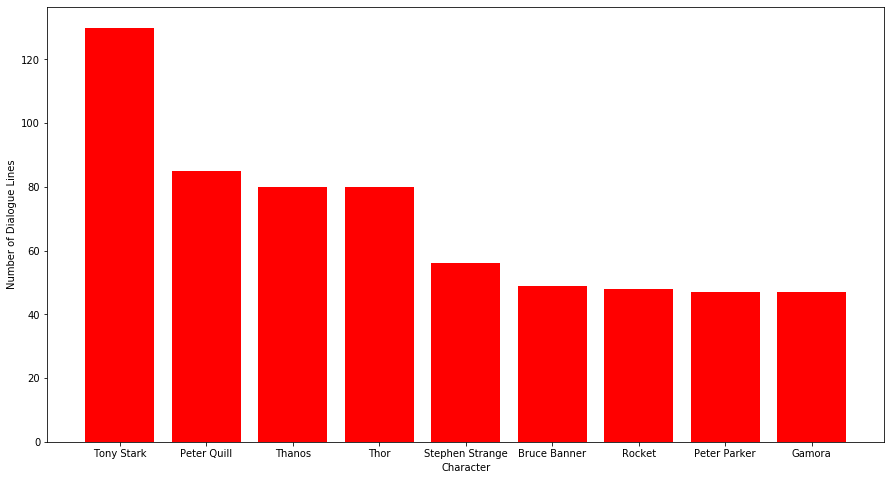

In [164]:
# create mapping from characters to count of dialogue lines and sort from most to least
char_lines = {character:len(script_df[script_df['character'] == character]) for character in characters}
char_lines = {k: v for k, v in sorted(char_lines.items(), key=lambda item: item[1], reverse=True)}

# get top 10 characters with most lines
subset_char_lines = {}
i = 0
for key in char_lines:
    if(i < 10 and key != "None"):
        subset_char_lines[key] = char_lines.get(key)
    i += 1
    
plt.figure(figsize=(15, 8))        
plt.bar(subset_char_lines.keys(), subset_char_lines.values(), color='red')
plt.ylabel('Number of Dialogue Lines')
plt.xlabel('Character')

## <a name="preprocessing"></a> Preprocessing dialogue

Now that we have structured the data, we can apply preprocessing techniques. Preprocessing refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for analysis. In terms of natural language processing, text preprocessing is the practice of cleaning and preparing text data. This is important because it transforms the text into a more digestable form for analysis. Without preprocessing, the data could be very inconsistent and generate bad analytical results. Text preprocessing can be broken down into 3 generic concepts:
    - Noise removal -> Stripping the text of formatting 
    - Normalization -> Reformating textual content
    - Tokenization -> Breaking up text into tokens
 
Since we want to be able to quickly and efficiently embody our character, we must acquire the relevant information that can help us prepare for our role. Text preprocessing enables us to extract important information from text, which allows us to better understand the natural language. 

In order to preprocess the script let's begin by extracting all the content from the movie.

In [10]:
script_text = script_df["dialogue"].str.cat(sep =" ") # extracting only dialogue lines
print(script_text)

Marvel Opening Credits Radio transmission sound The Marvel Studios Logo plays as usual but this time, at the end of that logo, the background changes from red to black and the I and O in Studios become 10 in red. The logo now reads Marvel Stud10s. Throughout the logo, an Asgardian is reporting a distress signal. This is the Asgardian refugee vessel Statesman. We are under assault, I repeat, we are under assault - The engines are dead, life support failing. Requesting aid from any vessel within range. We are 22 jump points out of Asgard.  Our crew is made up of Asgardian families, we have very few soldiers here. This is not a warcraft. I repeat, this is not a warcraft! Inside the ship, Ebony Maw walks among the bodies of dead Asgardians. Heimdall, badly wounded, reaches out as if he would stop Maw as he passes, but lacks the strength. Maw steps over them with no mind as he speaks, as if they were scattered pieces of dirty clothing on a bedroom floor. Hear me, and rejoice. You have had t

Now that we have the dialogue we can begin to preprocess it. We will preprocess the dialogue using the following steps:
    1. convert all letters to lowercase
    2. strip excess white space
    3. remove trailing 's
    4. remove stop words
    5. lemmatize
    6. remove single letters
    7. remove all non-alphanumeric characters
    8. tokenize
    

**Convert all letters to lowercase** - Converting all the letters of the text to lowercase is one of the simplest forms of preprocessing. By standardizing all the text to be in one format (lowercase), we can prevent mixed-case occurences of a word. Different variations in capitalization could result in different outputs, thus lowercasing the entire text prevents from counting the same word as a different one. For example, if we compared "Stones" to "stones", we would want these words to be considered the same across the document. This idea might be extremely relevant with regards to sentence rules, where the first letter at the start of a sentence must be capitalized. 

**Strip excess white space** - Stripping the excess white space is mainly used for cleaning up the text string. This deals with the removal of white space characters ('\n', '\t', ' ', '\r', '\f', and '\v') from the start and end of a string.  

**Remove trailing 's** - We want to remove trailing 's to remove possessives. An 's is usually used to show that a noun owns or is a member of something. We remove these cases to prevent nouns from being counting differently. For example if we had "Stark's" vs "Stark" we would still want both to be the same token "Stark", referring to Tony Stark.   

**Remove stop words** - Stop words are the commonly used words in the English language. They refer to a group of words which are highly frequently used without any additional information, such as articles, determiners, and prepositions. Some examples of stop words include "a", "i", "me", "its", etc. These words do not provide much information about the actual text, thus, we want to remove them so that we can focus on the ones that actually provide contextual importance. We will use the NLTK stopwords list to remove the stop words:

In [11]:
stop_words = stopwords.words('english')
print(stop_words)
print(f"\nTotal Words: {len(stop_words)}")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Lemmatization** - Process of reducing inflectional forms to a common base form. It uses lexical knowledge bases to get the correct base forms (dictionary form) of words. Lemmatization involves removing the suffix ending of words in order to keep the base version. 

![image](./pictures/lemma.png)

**Remove non-alphanumeric characters** - By removing all non-alphanumeric characters, we aim to only keep alphabetic letters and numbers. This is especially important for the removal of punctuation marks. Since punctuation marks
are used frequently in text, especially for dividing the text into sentences, paragraphs and phrases, we want to remove them so that we do not impact the occurrence frequencies of words. If we had the phrases "For example, a ..." and "An example is ..." we would want to consider the word example to be the same across both phrases. However, if punctuation is not removed, "example" and "example," would be considered as different tokens. The removal of punctuation marks adds the the precision (concise set) of tokens.

**Tokenization** - Deals with converting the text into tokens. A token is a smaller unit of the data. In terms of text processing, a token usually refers to a word, although some other cases might use characters or sub-words (splitting words). In our case, a token will be defined as a word. In order to process natural language and understand the context of a piece of text, we need to identify the words. An example of tokenization is as follows: 
"Tokenize the text" -> ["Tokenize", "the", "text"].

In [12]:
def clean_text(text):
    text = text.lower() # make all letters lowercase
    
    text = text.strip() # strip excess whitespace
    
    text = re.sub(r"\'s", "", text) # remove 's 
    
    WORD = re.compile('\w+')
    text = WORD.findall(text) # tokenize the text
    
    stop_words_set = set(stopwords.words('english')) # remove stop words using NLTK
    text = [word for word in text if not word in stop_words_set]
    
    lemmatizer = WordNetLemmatizer() # Lemmatize all words using NLTK
    text = [lemmatizer.lemmatize(word) for word in text]
    
    text = [word for word in text if len(word) != 1] # remove single letters
    
    space = " " # Reconstruct string
    text = space.join(text)
    
    text = re.sub(r"[^a-zA-Z0-9 ]+", "", text) # remove alphanumeric characters
    
    text = text.split() # tokenize

    return text

We can now apply the preprocessing on the script dialogue to get the word tokenization:

In [13]:
script_tokens = clean_text(script_text)
print(script_tokens)

['marvel', 'opening', 'credit', 'radio', 'transmission', 'sound', 'marvel', 'studio', 'logo', 'play', 'usual', 'time', 'end', 'logo', 'background', 'change', 'red', 'black', 'studio', 'become', '10', 'red', 'logo', 'read', 'marvel', 'stud10s', 'throughout', 'logo', 'asgardian', 'reporting', 'distress', 'signal', 'asgardian', 'refugee', 'vessel', 'statesman', 'assault', 'repeat', 'assault', 'engine', 'dead', 'life', 'support', 'failing', 'requesting', 'aid', 'vessel', 'within', 'range', '22', 'jump', 'point', 'asgard', 'crew', 'made', 'asgardian', 'family', 'soldier', 'warcraft', 'repeat', 'warcraft', 'inside', 'ship', 'ebony', 'maw', 'walk', 'among', 'body', 'dead', 'asgardians', 'heimdall', 'badly', 'wounded', 'reach', 'would', 'stop', 'maw', 'pass', 'lack', 'strength', 'maw', 'step', 'mind', 'speaks', 'scattered', 'piece', 'dirty', 'clothing', 'bedroom', 'floor', 'hear', 'rejoice', 'privilege', 'saved', 'great', 'titan', 'may', 'think', 'suffering', 'salvation', 'universal', 'scale',

## <a name="token"></a> Token Applications

Now that we have extracted all the tokens of the script you may be asking yourself how this can help you better prepare for your role? Tokens reveal a lot of information about the text. Since tokens are words, we can determine a lot about the script by analyzing the words within it. 

### Bag of Words

We can use the bag of words model to determine the most important topics across the movie. Bag of words is a model used to represent the text as a bag of words vector (a string of numbers). The bag of words is a representation of text that describes the occurrence of words within a document. This is represented through a token count, in which each token is mapped to its frequency count. The bag of words model simply deals with identifying if a word exists within the text, excluding the position relative to other tokens. This is mainly used for document classification, in which we determine the occurrence of a word in each document.

In [14]:
# compute the token counts for list of words 
def token_counts(words):
    tok_counts = dict()
    for word in words:
        if word not in tok_counts:
            tok_counts[word] = 0
        tok_counts[word] += 1
    return tok_counts

# list top 10 most used words in the script
script_token_counts = token_counts(script_tokens)
df_bow = pd.DataFrame.from_dict(script_token_counts, orient='index', columns=['Count'])
df_bow = df_bow.sort_values(by=['Count'], ascending=False)
print(df_bow.head(10))

         Count
thanos     163
stone      113
man         80
one         76
back        75
hand        74
strange     65
vision      60
right       58
know        56


By knowing which words appear the most and combining it with your preexisting knowledge of the Marvel universe, we can begin to infer about the topics of the movie. Looking at some of the most frequent tokens "thanos", "stone", and "hand" an assumption can be made that the movie is about Thanos and his quest to acquire the infinity stones to power his infinity guantlet hand. 

### Word Cloud

We can further look into the topics of the movie through the word cloud visualization. A word cloud is a visual representation of the token counts of a document. The words sizes are computed relative to the token counts, meaning that a larger word indicates a larger occurrence in the text. Word clouds present visual mediums in which important information such as main topics can quickly be processed and assessed.

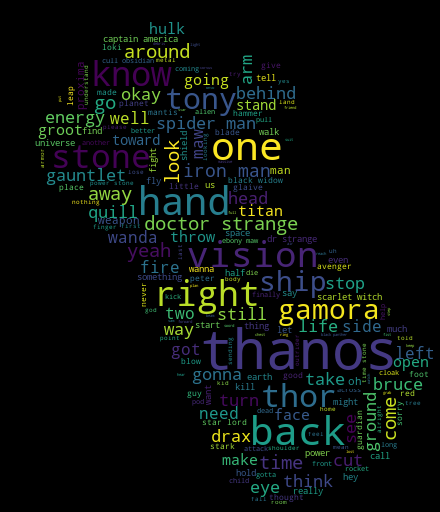

In [15]:
gauntlet_mask = np.array(Image.open("./pictures/gauntlet.png")) # 
transformed_gauntlet = np.ndarray((gauntlet_mask.shape[0],gauntlet_mask.shape[1]), np.int32)

# in order to use an image for the word cloud we need apply a mask that converts the white 
# part of the mask to 255 instead of 0
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
for i in range(len(transformed_gauntlet)):
    transformed_gauntlet[i] = list(map(transform_format, gauntlet_mask[i]))
    
wc = wordcloud.WordCloud(width=800,height=400,mask=transformed_gauntlet).generate(" ".join(script_tokens))
wc.to_image()

### N-gram

An n-gram is a contiguous sequence of n items from a given sample of text. It is simply a sequence of n words, that is to say a combination of adjacent words of length n. By constructing a sequence and counting the occurrences in a piece of text, we can generate a token sequence count, while also maintaining the spatial information (word positions relative to other words). With an n-gram model, we can predict the occurrence of a word based on the occurrence of its n-1 previous words. 

In [16]:
def compute_ngram(words, n):
    return [tuple(words[i:i+n]) for i in range(len(words) - n + 1)]

print(compute_ngram(script_tokens, 2))

[('marvel', 'opening'), ('opening', 'credit'), ('credit', 'radio'), ('radio', 'transmission'), ('transmission', 'sound'), ('sound', 'marvel'), ('marvel', 'studio'), ('studio', 'logo'), ('logo', 'play'), ('play', 'usual'), ('usual', 'time'), ('time', 'end'), ('end', 'logo'), ('logo', 'background'), ('background', 'change'), ('change', 'red'), ('red', 'black'), ('black', 'studio'), ('studio', 'become'), ('become', '10'), ('10', 'red'), ('red', 'logo'), ('logo', 'read'), ('read', 'marvel'), ('marvel', 'stud10s'), ('stud10s', 'throughout'), ('throughout', 'logo'), ('logo', 'asgardian'), ('asgardian', 'reporting'), ('reporting', 'distress'), ('distress', 'signal'), ('signal', 'asgardian'), ('asgardian', 'refugee'), ('refugee', 'vessel'), ('vessel', 'statesman'), ('statesman', 'assault'), ('assault', 'repeat'), ('repeat', 'assault'), ('assault', 'engine'), ('engine', 'dead'), ('dead', 'life'), ('life', 'support'), ('support', 'failing'), ('failing', 'requesting'), ('requesting', 'aid'), ('ai

### Cosine Similarity

Now that you have gotten a basic understanding of the movie you can begin to analyze the interaction between characters. On a high-level a quick measure for character interaction depends on the similarity between character dialogue lines. If two characters are talking to each other, we can assume that the conversation dialogue should be somewhat similar. Thus, we can compare how much characters interact with one another by comparing how similar their lines are through the concept of cosine similarity.

Cosine similarity measures the similarity between two vectors of an inner product space. The formula is as follows:

$similarity(A, B) = \frac{A * B}{||A||||B||}$

In the world of text mining, this can be used to compare the similarity between two documents. If we represent the documents as vectors of token frequency, we can apply this mathematical formula to compute a similarity score, with 1 being an identical match and 0 having no words in common. This is an important attribute used for search engines. By using Cosing similarity, search engines can compare the relevance of a document to the given search query. 



To further explain the idea of cosine similarity, we will compute the similarity score of the following documents:
* "my name is max" 
* "my name is oscar"

First we must begin by extracting the unique tokens from the documents:
- my
- name
- is
- max
- oscar

We can now compute the token counts for the unique tokens across each document

| my | name | is | max | oscar |
|----|------|----|-----|-------|
| 1  | 1    | 1  | 1   | 0     |
| 1  | 1    | 1  | 0   | 1     |

Now that we have the unique token counts we can create vectors representing the token counts for each document.
A = (1, 1, 1, 1, 0)
B = (1, 1, 1, 0, 1)


Using the vectors we can compute the similarity score:

$A * B = 1 * 1 + 1 * 1 + 1 * 1 + 1 * 0 + 1 * 0 = 3$

$||A|| = \sqrt{1^2 + 1^2 + 1^2 + 1^2 + 0^2} = 2$

$||B|| = \sqrt{1^2 + 1^2 + 1^2 + 0^2 + 1^2} = 2$


$similarity(A, B) = \frac{A * B}{||A||||B||} = \frac{3}{4} = 0.75$

These documents are 75% similar in content. This makes logical sense since the only word that is different among the documents is the name. Meaning that 3/4 words in each document are the same. 

In [17]:
def compute_cosine_similarity(textA, textB):
    textAWords = clean_text(textA)
    textBWords = clean_text(textB)
    if(textAWords == [] or textBWords == []):
        return 0
    thisTokenCounts = token_counts(textAWords)
    docTokenCounts = token_counts(textBWords)
    
    # Calculating vector product for numerator of formula
    numerator = 0
    for key in thisTokenCounts:
        if(key in docTokenCounts):
            numerator += (thisTokenCounts.get(key) * docTokenCounts.get(key))
        
    # Calculating vector size for this document
    thisVectorSize = 0;
    for key in thisTokenCounts:
        thisVectorSize += (thisTokenCounts.get(key) ** 2)
    
    # Calculating vector size for other document
    docVectorSize = 0
    for key in docTokenCounts:
        docVectorSize += (docTokenCounts.get(key) ** 2)

    return numerator / (math.sqrt(thisVectorSize) * math.sqrt(docVectorSize))

Let's test this by comparing the interactions between characters. Based on what we know from the movie, the characters are split into groups. For the most part the groups are 
- Group A: Strange, Stark, Wong, Banner, Parker
- Group B: Rocket, Groot, Thor
- Group C: Gamora, Drax, Quill, Mantis
- Group D: Captain America, Black Widow, War Machine, T'challa, Falcon

In [18]:
spider_man_lines_df = script_df[script_df['character'] == 'Peter Parker']
iron_man_lines_df = script_df[script_df['character'] == 'Tony Stark']
thor_lines_df = script_df[script_df['character'] == 'Thor']

spider_man_dialogue = spider_man_lines_df["dialogue"].str.cat(sep =" ")
iron_man_dialogue = iron_man_lines_df["dialogue"].str.cat(sep =" ")
thor_dialogue = thor_lines_df["dialogue"].str.cat(sep =" ")

print(f"Spide Man with Iron Man: {compute_cosine_similarity(spider_man_dialogue, iron_man_dialogue)}")
print(f"Spider Man with Thor: {compute_cosine_similarity(spider_man_dialogue, thor_dialogue)}")
print(f"Thor with Iron Man: {compute_cosine_similarity(thor_dialogue, iron_man_dialogue)}")

Spide Man with Iron Man: 0.4102200092405553
Spider Man with Thor: 0.20666812435467266
Thor with Iron Man: 0.31333262228763775


Considering spider man, iron man, and thor the dialogue between spider man and iron man should be more similar since they interact more commonly throughout the film. For the most part, spider man and iron man are together in a group before the final battle in Wakanda. Thus, it makes sense that the language between them is more similar, since they directly talk to each other more commonly than either would with Thor. This can be useful for understanding the relationships that exist between your character and others in the movie. Even though it may be important to know which characters you interact with, we still do not know the intent behind these interactions. In other words if these interactions are friendly, conflicting, neutral, etc. To find out this information, as well as better understand the character, we need to focus on the context of the text, rather than just the words themselves. 

## <a name="context"></a> Contextual Applications

Now that we have shown some of the capabilities of token analysis, let's explore some of the contextual applications. We will now use the meaning of the words to achieve further analysis. This deals with using the existing patterns (patterns in word structure) in the data to generate predictive results.

### Sentiment Analysis

Top actors do not only memorize their lines, but also bring out the thoughts / meaning behind them. An important aspect of how an actor portrays a line depends on the sentiment behind it. This relates to how actors express their thoughts and feelings as they speak their lines. In order to help you better understand the sentiment of your lines, you decided to create a sentiment analysis model using Naive Bayes algorithm. 

Sentiment analysis is the process of detecting positive or negative sentiment in text. In our example we will use it to detect polarity (positive and negative sentiment). This is important because it helps you understand the overall opinion of you character towards certain topics. For example, if you are an Avenger talking with Thanos about why it is not okay to eradicate half the population, you would probably convey negative sentiments towards his ideals. Understanding the sentiment associated with each line will help you present the emotion of your lines.
<br/>
<br/>

To understand the model we are going to create, you first need to understand Naive Bayes. A Naive Bayes classifier works by determining the probability of an event associated with a certain class, with the class usually representing the labels. Bayes theorem is as follows:

$P(X | Y) = \frac{P(Y | X)P(X)}{P(Y)}$

Naive Bayes extends upon this forumla by assuming that each individual feature $A_i$ is conditionally independent. Thus we can rewrite the formula:

$P(X | Y) = \prod_{i=1}^{n} P(X_i | Y)$

By reapplying Bayes theorem we can determine a formula for $P(B | A)$:

$P(Y | X) = \frac{P(X | Y)P(Y)}{\sum_{y} P(X | y)P(y)}$

There are some key points that we need to take into account. One issue is that when we are computing probabilites, using the following formula,

$P(y)\prod_{i=1}^{n} P(x_i | y)$

values tend to go to 0. Thus we can compute the probability in the log space which results in a new formula:

$logP(y) + \sum_{i=1}^{n} logP(x_i | y)$.

The second issue is smoothing. In the cases where we have never seen the $x_i$, the computed probability goes to 0, in which the log of that is negative infinity. To fix this issue we can apply Laplace smoothing which normalizes the 0 values in order to produce a probability. 
<br/>
<br/>

Now that we have a basic understanding of Naive Bayes, we can apply this to develop a sentiment analysis model. The overall goal is that we are attempting to determine if a data point should be considered positive or negative. We start by splitting the data into a training and test set. 

In [24]:
# we have provided labels for the dialogue lines which can be found in the sentiment_dialogue_labels.txt file
dialogue_with_labels_df = pd.read_csv("sentiment_dialogue_labels.txt", delimiter = " ")

# split data into train and test
dialogue_with_labels_df_copy = dialogue_with_labels_df.copy()
dialogue_train = dialogue_with_labels_df_copy.sample(frac=0.8, random_state=0)
dialogue_test = dialogue_with_labels_df_copy.drop(dialogue_train.index)


# split training data into negative and positive instances of tokenizd text 
def split_by_labels(dialogue_train):
    label_instances = {}
    for _, row in dialogue_train.iterrows():
        label = row["label"]
        if(label not in label_instances):
            label_instances[label] = []
        tokenized_dialogue = clean_text(row["dialogue"])
        if(tokenized_dialogue != []):
            label_instances[label].append(tokenized_dialogue)
    return label_instances


split_data = split_by_labels(dialogue_train)

We can apply the log space naive bayes formula to compute a proabability score for the text within that class. By comparing the probability scores of the classes, we can determine which is more likely and pick our label. 

As mentioned above we can use this formula to determine a probability score for a data point given a class. 

$logP(y) + \sum_{i=1}^{n} logP(x_i | y)$.

We can assume that $x_i$ represents a data feature and $y$ represents a class. 

To compute the $P(y)$ we need to determine the from the training set we are given, the probability of a data point being of that class. For example, if we are computed the P(y = -1), we are determining the probability of a text being labeled as negative. 

Typically in text mining the feature is represented via token counts. Thus, when calculating $P(x_i | y)$, we are computing the likelihood of that word for the given class. 

In [25]:
neg_text = split_data[-1] # get all the dialogue lines that are labeled negative
num_neg_text = float(len(neg_text)) # number of lines labeled negative
neg_text_tc = token_counts(list(np.concatenate(neg_text).flat)) # token counts for negative labeled text
neg_text_tc_total = sum(neg_text_tc.values()) # number of words in negative labeled text

pos_text = split_data[1] # get all the dialogue lines that are labeled positive
num_pos_text = float(len(pos_text)) # number of lines labeled positive
pos_text_tc = token_counts(list(np.concatenate(pos_text).flat)) # token counts for positive labeled text
pos_text_tc_total = sum(pos_text_tc.values()) # number of words in positive labeled text

total_text_counts = (num_neg_text + num_pos_text) # size of training set
neg_log_prob = np.log(num_neg_text / total_text_counts) # log(P(y)) = log(P(negative label))
pos_log_prob = np.log(num_pos_text / total_text_counts) # log(P(y)) = log(P(positive label))

all_words = list(np.concatenate(neg_text).flat) + list(np.concatenate(pos_text).flat)
all_words_set = set(all_words)
all_words_set_len = len(all_words_set) # |V|

neg_word_likelihood = {}
pos_word_likelihood = {}
for word in all_words_set:
    neg_word_count = 0
    if(word in neg_text_tc):
        neg_word_count = neg_text_tc[word] # how many times the word has appeared before in the negative set of words
        
    pos_word_count = 0
    if(word in pos_text_tc):
        pos_word_count = pos_text_tc[word] # how many times the word has appeared before in the positive set of words
        
    # compute the log likelihood of word given class log(P(x_i | y)) with laplace smoothing applied
    neg_word_likelihood[word] = np.log((neg_word_count + 1) / (neg_text_tc_total + 1 * all_words_set_len))
    pos_word_likelihood[word] = np.log((pos_word_count + 1) / (pos_text_tc_total + 1 * all_words_set_len))

Now that we have computed the likelihood of each word given a class, we can determine the predicted classification. This is represented via the summation of the log space formula, where we add together all the probabilites of each word in the given text. The larger probability between negative or positive indicates the predicted result.

In [27]:
def predict(df):
    correct = 0
    for _, row in df.iterrows(): 
        line = row['dialogue']
        words = clean_text(row["dialogue"])
        neg_pred_score = neg_log_prob
        pos_pred_score = pos_log_prob
        for word in words: # compute the negative and positive scores for the text
            if(word in all_words_set):
                neg_pred_score += neg_word_likelihood[word] # compute summation of log prediction score for negative class 
                pos_pred_score += pos_word_likelihood[word] # compute summation of log prediction score for positive class 

        actual_row = dialogue_with_labels_df[dialogue_with_labels_df["dialogue"] == line]
        actual = actual_row["label"].values[0]
        if(neg_pred_score >= pos_pred_score): # compare probabilities and assign a prediction score
            pred = -1
        else:
            pred = 1
        if(pred == actual):
            correct += 1
    acc = correct / (len(dialogue_test))
    print(f"\nPrediction accuracy: {acc}")
    
predict(dialogue_test)


Prediction accuracy: 0.7711442786069652


In [ ]:
clustering without having to label manually

### Predicting Next Word

Assume you're preparing your lines and you realize that some of them do not truly represent what your character would say. You want to replace some of the wording in those lines for other terms your character is likely to say. However, the same issue arises where the lack of preparation time leads to not knowing what the best replacement could be. Then you remeber you can use the existing text to predict the next words that your character might say given a starting phrase / word. Markov chains are stochastic models used to represent probabilistic transitions between states. You can think of a markov chain similarly to a graph with nodes and edges. In a markov chain the nodes are the states and the edges are the transitions. Consider the following markov chain:


<img src="./pictures/graph.png" alt="Markov chain shown as graph" width="750" height="750">
In this chain the states are "aba", "baa", "bab", and "aab". The transitions are indicated by through the edges. Some example include "aba" -> "aba", "aba" -> "bab", etc.

This can be applied in text mining for word prediction. An important characteristic of a Markov chain is that the future state is only dependent on the current state. This means that future states are not dependent upon the steps that led up to the current state. This can be represented through the conditional probability:

<br/>
<div style="text-align: center;">
$P(X_n = x | X_{n-1} = y_1, X_{n-2} = y_2, ...) = P(X_n = x | X_{n-1} = y)$
</div>
<br/>

Given a word (current state) and a document (used to determine word transitions), we can predict the next word using markov chains. More specifically, the n-gram Markov model predicts the next word in dependence on the previous n words.

To better understand how Markov chains work let's understand the following example:

Assume you are given the following documents and are attempting to predict the word that shoud come after 'like'
* I like chocolate 
* I am Max
* I like soccer
* I like rock

We can use a where each word represents a state.

"I" -> "like" -> "chocolate"

"I" -> "am" -> "Max"

"I" -> "like" -> "soccer"

"I" -> "like" -> "rock"

Since we only care about the current state we can write out the possibilities for each potential state.


<img src="./pictures/Markov.png" alt="Markov chain sequence" width="750" height="750">

To better show the probabilities of each transition, we can construct a probability state transition matrix: 

|      | I | like | am  | soccer | chocolate | rock | Max |
|------|---|------|-----|--------|-----------|------|-----|
| **I**    | 0 | 0.5  | 0.5 | 0      | 0         | 0    | 0   |
| **like** | 0 | 0    | 0   | 0.33   | 0.33      | 0.33 | 0   |
| **am**   | 0 | 0    | 0   | 0      | 0         | 0    | 1   |


Thus, there is a 33% chance that the word proceeding 'like' is 'chocolate' or 'soccer' or 'rock'. 

In [53]:
def predict_next_word(dialogue_text, current_word):
    dialogue_tokens = clean_text(dialogue_text)
    if(current_word not in dialogue_tokens):
        return "Word not in text"
    dialogue_bigrams = compute_ngram(dialogue_tokens, 2) # compute bigrams of text

    dialogue_bow = token_counts(dialogue_tokens) # compute token counts for words
    dialogue_bow_bigrams = token_counts(dialogue_bigrams) # copute token counts for bigrams

    # create a probability state transition matrix 
    probabilities = []
    bow_keys = list(dialogue_bow.keys())
    for i in range(len(bow_keys) - 1): # first word
        word_probabilities = []
        word = bow_keys[i]
        for j in range(len(bow_keys)): # second word
            word2 = bow_keys[j]
            bigram = (word, word2) # create bigram with words
            bigram_count = dialogue_bow_bigrams.get(bigram) # get bigram counts
            if(bigram_count == None):
                bigram_count = 0
            prob = float(bigram_count) / float(dialogue_bow.get(word)) # compute probability
            word_probabilities.append(prob)
        probabilities.append(word_probabilities)

    markov_probs_df = pd.DataFrame(data=np.array(probabilities), index=bow_keys[:-1], columns=bow_keys)
    print(markov_probs_df)
    print("\n")
    
    return np.random.choice(bow_keys, p=markov_probs_df.loc[current_word]) # get random choice based on probabilities

Let's try to predict Nick Fury's next word :).

In [59]:
fury_lines_df = script_df[script_df['character'] == 'Nick Fury']
fury_dialogue_text = fury_lines_df["dialogue"].str.cat(sep =" ")
current_word = "oh"
predicted_word = predict_next_word(fury_dialogue_text, current_word)

print(f"{current_word} ______")
print(f"Predicted word: {predicted_word}")
print(f"{current_word} {predicted_word}")

           still  word  stark  energy  signature  new  york  tell  klein  \
still        0.0   1.0    0.0     0.0        0.0  0.0   0.0   0.0    0.0   
word         0.0   0.0    1.0     0.0        0.0  0.0   0.0   0.0    0.0   
stark        0.0   0.0    0.0     1.0        0.0  0.0   0.0   0.0    0.0   
energy       0.0   0.0    0.0     0.0        1.0  0.0   0.0   0.0    0.0   
signature    0.0   0.0    0.0     0.0        0.0  1.0   0.0   0.0    0.0   
new          0.0   0.0    0.0     0.0        0.0  0.0   1.0   0.0    0.0   
york         0.0   0.0    0.0     0.0        0.0  0.0   0.0   1.0    0.0   
tell         0.0   0.0    0.0     0.0        0.0  0.0   0.0   0.0    1.0   
klein        0.0   0.0    0.0     0.0        0.0  0.0   0.0   0.0    0.0   
meet         0.0   0.0    0.0     0.0        0.0  0.0   0.0   0.0    0.0   
okay         0.0   0.0    0.0     0.0        0.0  0.0   0.0   0.0    0.0   
call         0.0   0.0    0.0     0.0        0.0  0.0   0.0   0.0    0.0   
control     

## <a name="summary"></a> Summary and references

This tutorial explored some of the elements of what is possible with text mining in Python. Much more detail about the concepts can be found in the following links
1. Text Mining: https://www.ibm.com/cloud/learn/text-mining#:~:text=Text%20mining%2C%20also%20known%20as,meaningful%20patterns%20and%20new%20insights.&text=Structured%20data%20can%20include%20inputs,%2C%20addresses%2C%20and%20phone%20numbers

2. Text Preprocessing: https://annals-csis.org/Volume_14/drp/pdf/46.pdf

3. n-grams: https://towardsdatascience.com/understanding-word-n-grams-and-n-gram-probability-in-natural-language-processing-9d9eef0fa058

4. Sentiment analysis: https://monkeylearn.com/sentiment-analysis/

5. naive bayes algorithm: https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece

6. Markov Chains: https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial









